In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, models
import torchvision.transforms as transforms
from datetime import datetime
from torch.utils import data
import random

In [3]:
#transform the images to the default input shape 224x224
transform = transforms.Compose([transforms.Resize([224, 224]), transforms.ToTensor()])
data_set = datasets.ImageFolder(root = 'data', transform = transform)
n = len(data_set)
n_test = int( n * .2 )
n_train = n - n_test

In [4]:
# train, test split
train_set, test_set = data.random_split(data_set, (n_train, n_test))

In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 128, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 128, shuffle = True)

In [11]:
#Select 10 random images of each class.
path = 'data/'
num_files_per_folder = [len(files) for root, dirs, files in os.walk('data') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('data') if len(dirs) > 0][0]
filenames = [os.listdir('data/' + folder) for folder in folders]
files = [np.random.choice(files, 10, replace = False) for files, num_files in zip(filenames, num_files_per_folder)]

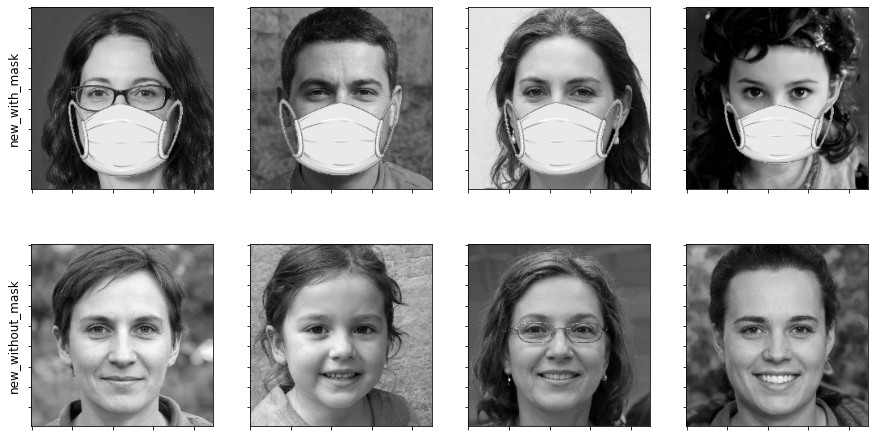

In [13]:
fig, ax = plt.subplots(2, 4, figsize = (15, 8))
for row in range(2):
    category = folders[row]
    ax_row = ax[row]
    for column in range(4):
        img = plt.imread(path + category + '/' + files[row][column])
        ax_column = ax_row[column]
        ax_column.imshow(img, cmap='gray')
        if column == 0:
            ax_column.set_ylabel(category, size = 'large')
        ax_column.set_xticklabels([])
        ax_column.set_yticklabels([])